Como questão de conhecimento, vamos fazer alguns projetos de fisica, sendo o primeiro a visualização
de linhas de cargas do campo eletrico. Segue que a lei que rege esse fenomeno é
$$
\begin{align}
\mathbf{E(r)} = \sum_{i=0}^{n-1}kq_i \frac{\mathbf{r - r_i}}{| \mathbf{r - r_i}| ^3}
\end{align}
$$

In [116]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from copy import deepcopy
def makefields_fix(xs, ys):
    charges = {1: (-1,0), -0.99999: (1,0)} #carga 1 em (-1,0) e -1 em (1,0)
    n = len(xs)
    Exs = [[0 for k in range(n)] for j in range(n)]
    Eys = deepcopy(Exs)
    for j, x in enumerate(xs):
        for k, y in enumerate(ys):
            for q,pos in charges.items():
                posx, posy = pos
                R = np.sqrt((x - posx)**2 + (y - posy)**2)
                Exs[k][j] += q*(x - posx) / R**3
                Eys[k][j] += q*(y - posy) / R**3
    return Exs, Eys



def plotfield(boxl, n, n_charges):
    """boxl= tamanho l da nossa caixa
       n: resolução do grid
       n_charges: raiz da quantidade de cargas que queremos"""
    
    xs = [-boxl + i * 2 * boxl / (n-1) for i in range(n)]
    ys = xs[:]
    Exs, Eys = makefields_fix(xs, ys, n_charges)
    xs = np.array(xs)
    ys = np.array(ys)
    Exs = np.array(Exs)
    Eys = np.array(Eys)
    magnitude= np.log(np.sqrt(Exs**2 + Eys**2))/np.max(np.log(np.sqrt(Exs**2 + Eys**2)))
    plt.streamplot(xs, ys, Exs, Eys, density=1.5,cmap=plt.cm.inferno,color=magnitude,linewidth=magnitude)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.show()


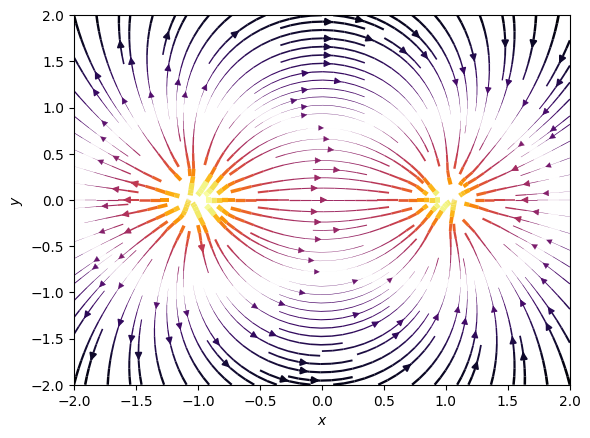

In [109]:
plotfield(2, 20)

In [122]:
def kahansum(xs):
    s = 0
    e = 0
    for x in xs:
        temp = s
        y = x + e
        s = temp + y
        e = (temp - s) + y
    return s

In [123]:

def chargearray(nvals):
    vals = [-0.5 + i/(nvals-1) for i in range(nvals)]
    qtops = {}
    for i, posx in enumerate(vals):
        for j, posy in enumerate(vals):
            count = j + nvals*i + 1
            key = 1.02*count if (i+j)%2==0 else -count
            qtops[key] = posx, posy
    return qtops
def vecmag(rs):
    sq = [r**2 for r in rs]
    return sqrt(kahansum(sq))
def fullpot(qtops, rs):
    potvals = []
    for q, pos in qtops.itens():
        diffs = [r - po for r,po in zip(rs,pos)]
        R = vecmag(diffs)
        potvals.append(q/R)
    return kahansum(potvals)

In [155]:
def makefields(xs, ys, n):
    charges = chargearray(n) #n_cargas
    n = len(xs)
    Exs = [[0 for k in range(n)] for j in range(n)]
    Eys = deepcopy(Exs)
    for j, x in enumerate(xs):
        for k, y in enumerate(ys):
            for q,pos in charges.items():
                posx, posy = pos
                R = np.sqrt((x - posx)**2 + (y - posy)**2)
                Exs[k][j] += q*(x - posx) / R**3
                Eys[k][j] += q*(y - posy) / R**3
    return Exs, Eys
def plotfield(boxl, n, n_charges):
    """boxl= tamanho l da nossa caixa
       n: resolução do grid
       n_charges: raiz da quantidade de cargas que queremos"""
    
    xs = [-boxl + i * 2 * boxl / (n-1) for i in range(n)]
    ys = xs[:]
    Exs, Eys = makefields(xs, ys, n_charges)
    xs = np.array(xs)
    ys = np.array(ys)
    Exs = np.array(Exs)
    Eys = np.array(Eys)
    magnitude = np.log(np.sqrt(Exs**2 + Eys**2))
    magnitude = magnitude/np.linalg.norm(magnitude)
    plt.streamplot(xs, ys, Exs, Eys, density=2.5, cmap=plt.cm.inferno, color=magnitude)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.show()

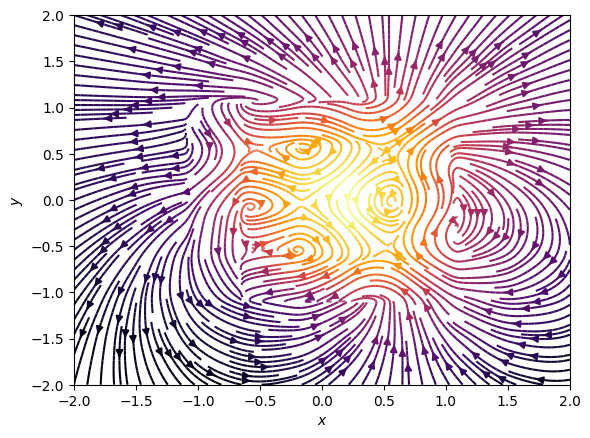

In [159]:
plotfield(2, 10, 6)

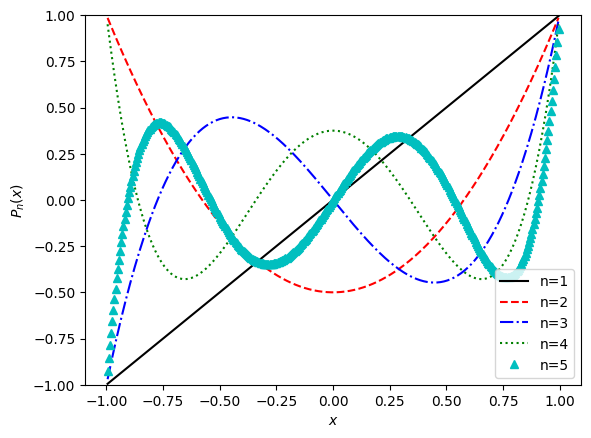

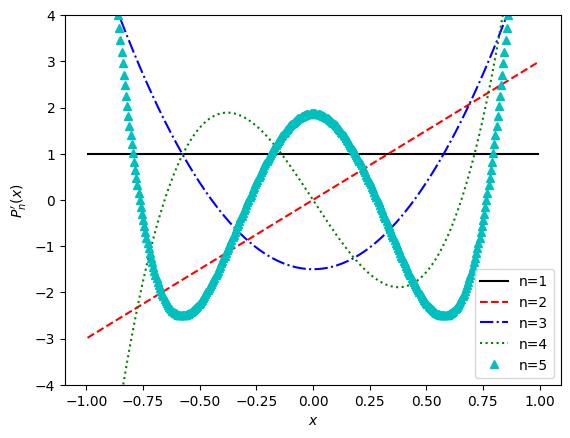

In [167]:
#polinomios de Legendre
def legendre(n, x):
    """n: grau do legendre
       x: range"""
    if n == 0:
        val2 = 1
        dval2 = 0
    elif n ==1:
        val2 = x
        dval2 = 1
    else:
        val0 = 1; val1 = x
        for j in range(1,n):
            val2 = ((2*j+1)*x*val1 - j*val0)/(j+1)
            val0, val1 = val1, val2
        dval2 = n*(val0-x*val1)/(1-x**2)
    return val2, dval2

def plotlegendre(der, nsteps):
    """der: ser 0 é a função normal, se 1 é a derivada
       nsteps: quantos pontos são para plotar"""
    plt.xlabel('$x$')
    dertostr = {0: "$P_n(x)$", 1: "$P_n^\prime (x)$"}
    plt.ylabel(dertostr[der])
    
    ntomarker = {1: 'k-', 2: 'r--', 3: 'b-.', 4: 'g:', 5: 'c^'}
    xs = [i/nsteps for i in range (-nsteps+1, nsteps)]
    for n, marker in ntomarker.items():
        ys = [legendre(n,x)[der] for x in xs]
        labstr = 'n={0}'.format(n)
        plt.plot(xs, ys, marker, label=labstr, linewidth=1.5)
        
    plt.ylim(-3*der-1, 3*der+1)
    plt.legend(loc=4)
    plt.show()
nsteps=200
plotlegendre(0,nsteps=nsteps)
plotlegendre(1, nsteps=nsteps)